In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

# === Settings ===
categories = [
    "remote-data-jobs",
    "remote-dev-jobs",
    "remote-design-jobs",
    "remote-marketing-jobs",
    "remote-sales-jobs",
    "remote-customer-support-jobs",
    "remote-product-jobs"
]

random.shuffle(categories)  # randomize category order

headers = {"User-Agent": "Mozilla/5.0"}
max_jobs = 1400  # total jobs cap
max_pages_per_category = 10  # per-category page cap
all_jobs = []

for category in categories:
    for page in range(1, max_pages_per_category + 1):
        if len(all_jobs) >= max_jobs:  # ✅ stop once we reach total target
            break

        url = f"https://remoteok.com/{category}?page={page}"
        print(f"🔎 Scraping: {url}")

        try:
            response = requests.get(url, headers=headers, timeout=10)
        except requests.exceptions.RequestException as e:
            print(f"⚠️ Request failed: {e}")
            break

        if response.status_code != 200:
            print(f"⚠️ Failed to fetch {url}, skipping.")
            break

        soup = BeautifulSoup(response.text, "html.parser")
        jobs = soup.find_all("tr", class_="job")

        if not jobs:  # ✅ no more jobs in this category
            print(f"✅ No more jobs in {category}, moving on.")
            break

        for job in jobs:
            if len(all_jobs) >= max_jobs:  # ✅ safeguard against overshoot
                break

            try:
                title = job.find("h2", itemprop="title").get_text(strip=True)
                company = job.find("h3", itemprop="name").get_text(strip=True)
                location = job.find("div", class_="location").get_text(strip=True) if job.find("div", class_="location") else "Remote"
                posted_date = job.find("time")["datetime"] if job.find("time") else None

                # Extract skills
                skills = [skill.get_text(strip=True) for skill in job.find_all("div", class_="tag")]
                skills_str = ", ".join(skills)

                # Extract description
                desc_tag = job.find("td", class_="company_and_position") or job.find("div", class_="description")
                description = desc_tag.get_text(" ", strip=True) if desc_tag else ""

                all_jobs.append({
                    "Title": title,
                    "Company": company,
                    "Location": location,
                    "Skills": skills_str,
                    "Date": posted_date,
                    "Category": category.replace("remote-", "").replace("-jobs", ""),
                    "Description": description
                })

            except Exception as e:
                print("⚠️ Error extracting job:", e)
                continue

        time.sleep(random.uniform(1.5, 3.0))  # ✅ polite random delay

# === Save to CSV ===
df = pd.DataFrame(all_jobs)
df.to_csv("remoteok_jobs34.csv", index=False, encoding="utf-8")

print(f"✅ Saved {len(df)} jobs (max {max_jobs}) across {len(categories)} randomized categories to remoteok_jobs34.csv")


🔎 Scraping: https://remoteok.com/remote-customer-support-jobs?page=1
🔎 Scraping: https://remoteok.com/remote-customer-support-jobs?page=2
🔎 Scraping: https://remoteok.com/remote-customer-support-jobs?page=3
🔎 Scraping: https://remoteok.com/remote-customer-support-jobs?page=4
🔎 Scraping: https://remoteok.com/remote-customer-support-jobs?page=5
🔎 Scraping: https://remoteok.com/remote-customer-support-jobs?page=6
🔎 Scraping: https://remoteok.com/remote-customer-support-jobs?page=7
🔎 Scraping: https://remoteok.com/remote-customer-support-jobs?page=8
🔎 Scraping: https://remoteok.com/remote-customer-support-jobs?page=9
🔎 Scraping: https://remoteok.com/remote-customer-support-jobs?page=10
🔎 Scraping: https://remoteok.com/remote-product-jobs?page=1
🔎 Scraping: https://remoteok.com/remote-product-jobs?page=2
🔎 Scraping: https://remoteok.com/remote-product-jobs?page=3
🔎 Scraping: https://remoteok.com/remote-product-jobs?page=4
🔎 Scraping: https://remoteok.com/remote-product-jobs?page=5
🔎 Scrapin

In [36]:
df = pd.read_csv('remoteok_jobs34.csv')
df.head()

,Title,Company,Location,Skills,Date,Category,Description
0,Work from Home Customer Service Assistant,Washing State Pharmacy Association,🇺🇸 United States,"Sales, Admin, Salesforce, Virtual Assistant, D...",2025-08-21T01:14:09+00:00,customer-support,Work from Home Customer Service Assistant Wash...
1,ADMINISTRATIVE ASSISTANT USA RESIDENTS ONLY,MasterCraft,🇺🇸 United States,"Admin, Data Entry, Customer Service",2025-08-11T00:00:06+00:00,customer-support,ADMINISTRATIVE ASSISTANT USA RESIDENTS ONLY 🎈 ...
2,DeFi Analyst and Educator,Decentralized Masters,🌏 Worldwide,"Edu, Teaching, Crypto",2025-08-22T13:22:49+00:00,customer-support,DeFi Analyst and Educator verified Decentraliz...
3,Admin and Support Specialist With Love for Wri...,Interaction Design Foundation,🌏 Worldwide,"Content Writing, Writing",2025-07-21T10:40:34+00:00,customer-support,Admin and Support Specialist With Love for Wri...
4,Virtual Assistant $25 Hourly,Brookview Lawncare,🇺🇸 United States,NaN,2025-07-12T00:00:09+00:00,customer-support,Virtual Assistant $25 Hourly 🎈 verified Brookv...


In [37]:
# Quick info & missing values
df.info()
print("\nMissing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1400 non-null   object
 1   Company      1400 non-null   object
 2   Location     1400 non-null   object
 3   Skills       1320 non-null   object
 4   Date         1400 non-null   object
 5   Category     1400 non-null   object
 6   Description  1400 non-null   object
dtypes: object(7)
memory usage: 76.7+ KB

Missing values per column:
 Title           0
Company         0
Location        0
Skills         80
Date            0
Category        0
Description     0
dtype: int64


In [38]:
# Finding number of unique values in each column
for i in df.columns:
    print(i, df[i].nunique())

Title 115
Company 103
Location 27
Skills 131
Date 125
Category 7
Description 125


In [39]:
#Dropping rows having null values in skill column
df.dropna(subset=['Skills'], inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 0 to 1399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1320 non-null   object
 1   Company      1320 non-null   object
 2   Location     1320 non-null   object
 3   Skills       1320 non-null   object
 4   Date         1320 non-null   object
 5   Category     1320 non-null   object
 6   Description  1320 non-null   object
dtypes: object(7)
memory usage: 82.5+ KB


In [41]:
for i in df.columns:
    print(i, df[i].nunique())

Title 109
Company 96
Location 27
Skills 131
Date 117
Category 7
Description 117


In [42]:
# Dropping duplicate values having same jobs of title and company
df.drop_duplicates(subset=["Title", "Company"], inplace = True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 0 to 1219
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        116 non-null    object
 1   Company      116 non-null    object
 2   Location     116 non-null    object
 3   Skills       116 non-null    object
 4   Date         116 non-null    object
 5   Category     116 non-null    object
 6   Description  116 non-null    object
dtypes: object(7)
memory usage: 7.2+ KB


In [45]:
# Printing values of after removing duplicate values
for i in df.columns:
    print(i, df[i].nunique())

Title 109
Company 96
Location 27
Skills 115
Date 116
Category 7
Description 116


In [47]:
df.duplicated().sum()

np.int64(0)

📍 Location-based trends
Let's see where the jobs are located.
We will count how many postings each location has and plot the top ones.

In [51]:
location_counts = df['Location'].value_counts(dropna=False)
print("Job counts by location:\n", location_counts)

Job counts by location:
 Location
🌏 Worldwide                 46
🇪🇺 Europe                   16
🇺🇸 United States            12
🌏 Probably worldwide         9
💃 Latin America              4
🇺🇸 United States 🔒           3
🇯🇵 Japan                     3
🇮🇳 India                     3
🇬🇧 United Kingdom            2
🌍 Africa                     1
🇦🇺 Australia                 1
💰 $140k - $180k              1
🇧🇷 Brazil                    1
Remote within Europe         1
Anywhere (Open Globally)     1
🇵🇱 Poland                    1
🇭🇰 Hong Kong                 1
Palo Alto                    1
Globally Remote              1
1 Remote                     1
Work From Home               1
🇵🇭 Philippines               1
🇨🇦 Canada                    1
Chicago, IL                  1
Hyderabad                    1
Hamburg                      1
🇹🇼 Taiwan                    1
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127759 (\N{EARTH GLOBE ASIA-AUSTRALIA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128131 (\N{DANCER}) missing from font(s) DejaVu Sans.
  f

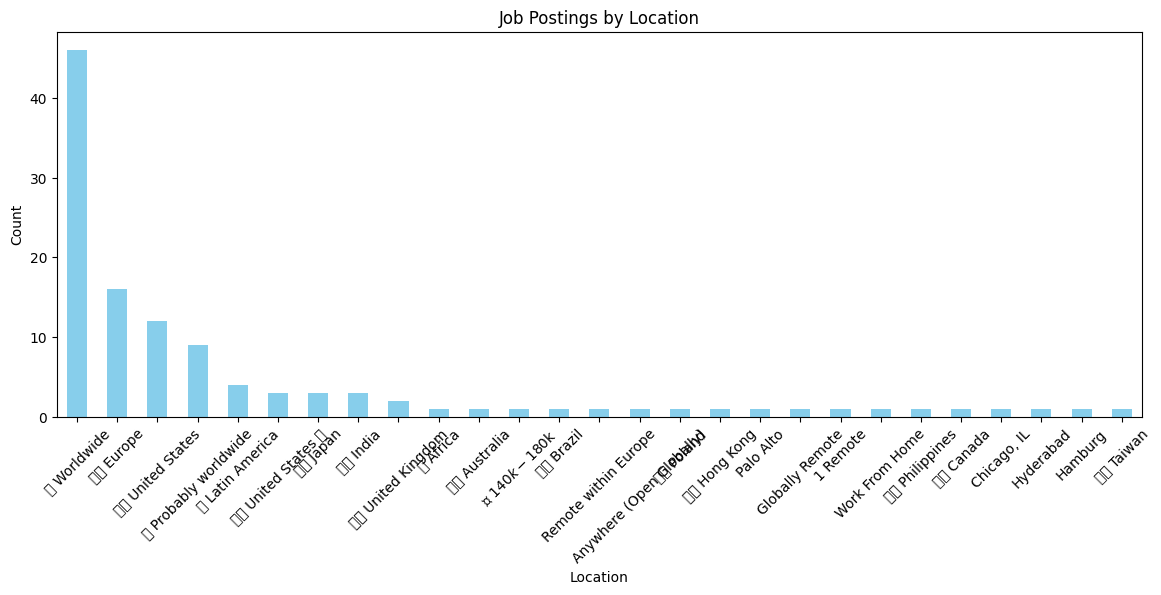

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
location_counts.plot(kind='bar', color='skyblue')
plt.title("Job Postings by Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [58]:
# Ensure date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [59]:
jobs_per_day = df.groupby(df['Date'].dt.date).size()

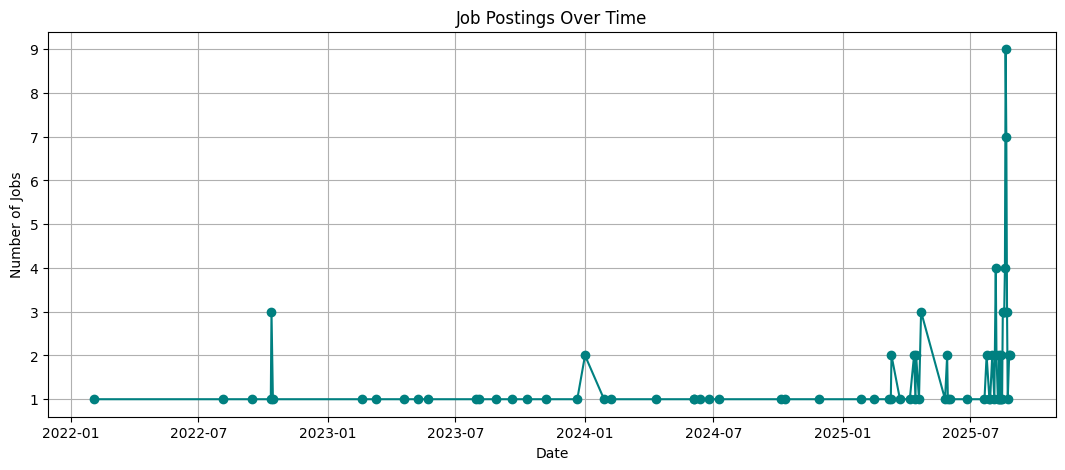

In [60]:
plt.figure(figsize=(13,5))
jobs_per_day.plot(kind='line', marker='o', color='teal')
plt.title("Job Postings Over Time")
plt.ylabel("Number of Jobs")
plt.xlabel("Date")
plt.grid(True)
plt.show()

In [61]:
top_companies = df['Company'].value_counts().head(10)
print("Top companies hiring:\n", top_companies)

Top companies hiring:
 Company
Indeed                           4
Contra                           4
Proxify                          3
Interaction Design Foundation    3
FetLife                          2
Silverfin                        2
LimeSurvey                       2
MasterCraft                      2
Soda Data                        2
Symplast                         2
Name: count, dtype: int64


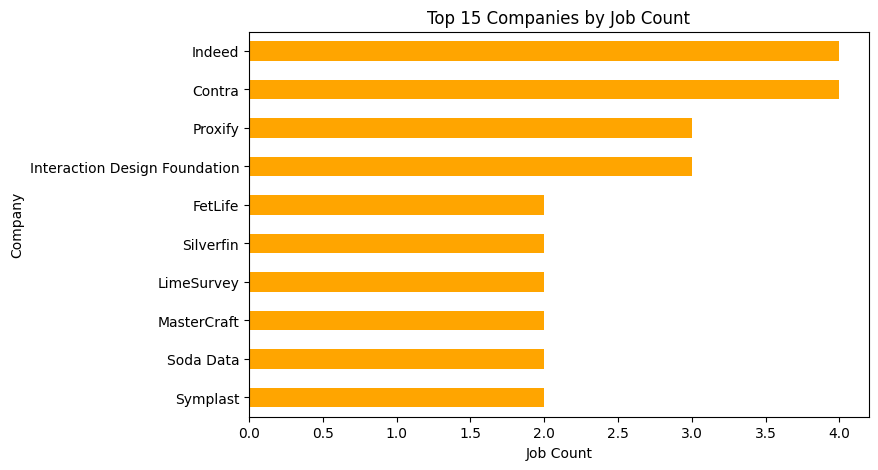

In [63]:
plt.figure(figsize=(8,5))
top_companies.plot(kind='barh', color='orange')
plt.title("Top 15 Companies by Job Count")
plt.xlabel("Job Count")
plt.gca().invert_yaxis()
plt.show()

In [64]:
title_counts = df['Title'].str.strip().str.title().value_counts()
title_counts.head(15)

,count
Title,
Product Owner,2
Senior Full Stack Engineer,2
Senior Product Designer,2
Product Engineer,2
Web Developer,2
Senior Data Engineer,2
Account Executive,2
Spoke Person,1
Data Entry Virtual Assistant,1


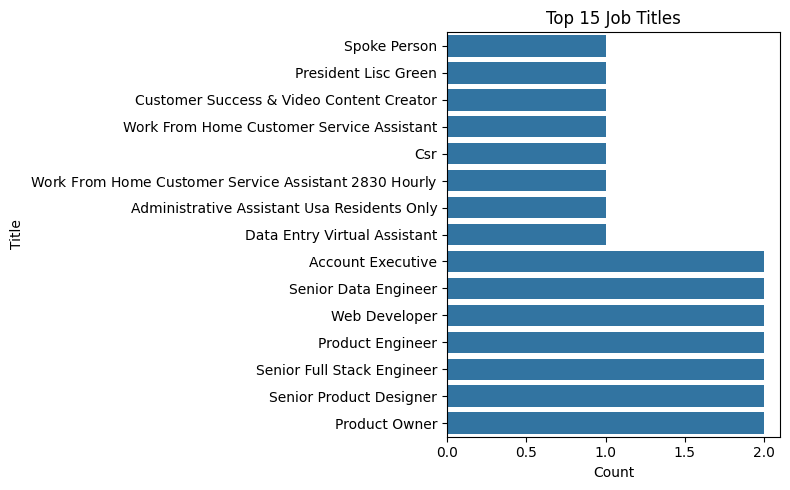

In [73]:
import seaborn as sns
top_titles = title_counts.head(15).sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=top_titles.values, y=top_titles.index)
plt.title("Top 15 Job Titles")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

In [66]:
for col in ['Skills', 'Location', 'Title']:
    if col in df.columns:
        df[col] = df[col].str.lower().str.strip()

In [68]:
from collections import Counter
#Top 15 in demand skills
all_skills = [skill.strip() for skill in ', '.join(df['Skills']).split(',')]
skill_counts = Counter(all_skills)
top_skills = skill_counts.most_common(15)
skill_df = pd.DataFrame(top_skills, columns=['Skill', 'Frequency'])

In [69]:
# Top 15 Job Locations
location_counts = df['Location'].value_counts().head(15)

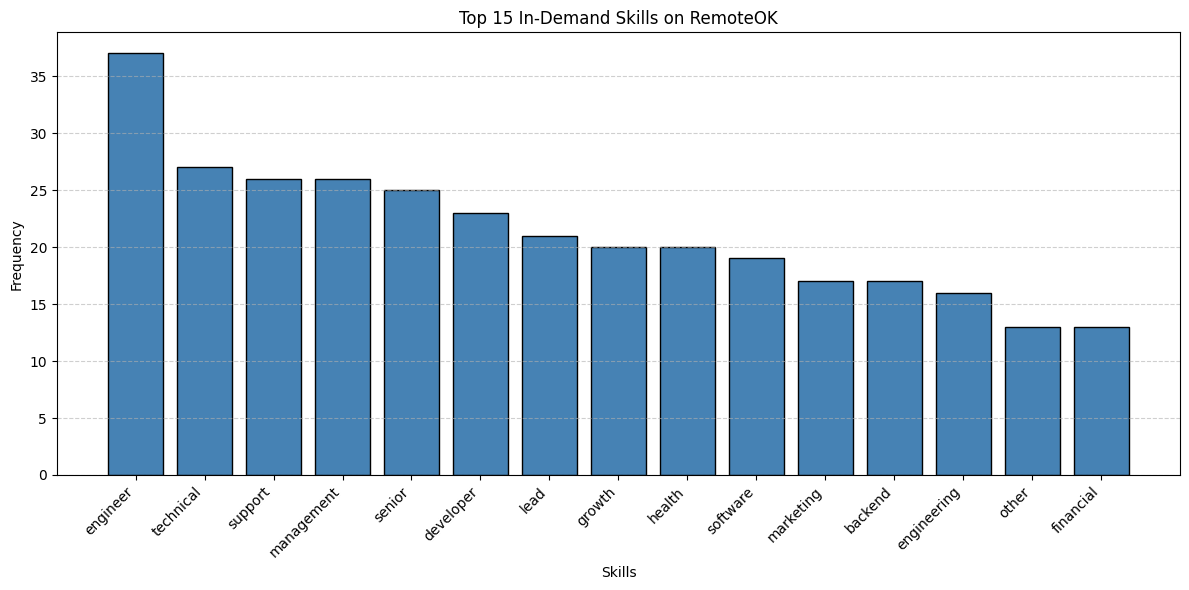

In [70]:
# Plot Top Skills
plt.figure(figsize=(12, 6))
plt.bar(skill_df['Skill'], skill_df['Frequency'], color='steelblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 In-Demand Skills on RemoteOK')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2186949739.py:9: UserWarning: Glyph 127759 (\N{EARTH GLOBE ASIA-AUSTRALIA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2186949739.py:9: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2186949739.py:9: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2186949739.py:9: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2186949739.py:9: UserWarning: Glyph 128131 (\N{DANCER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2186949739.py:9: UserWarning: Glyph 128274 (\N{LOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2186949739.py:9: UserWarning: Glyph 127471 (\N{REGIONAL INDICATOR SYMBOL LETTER J}) missing from fo

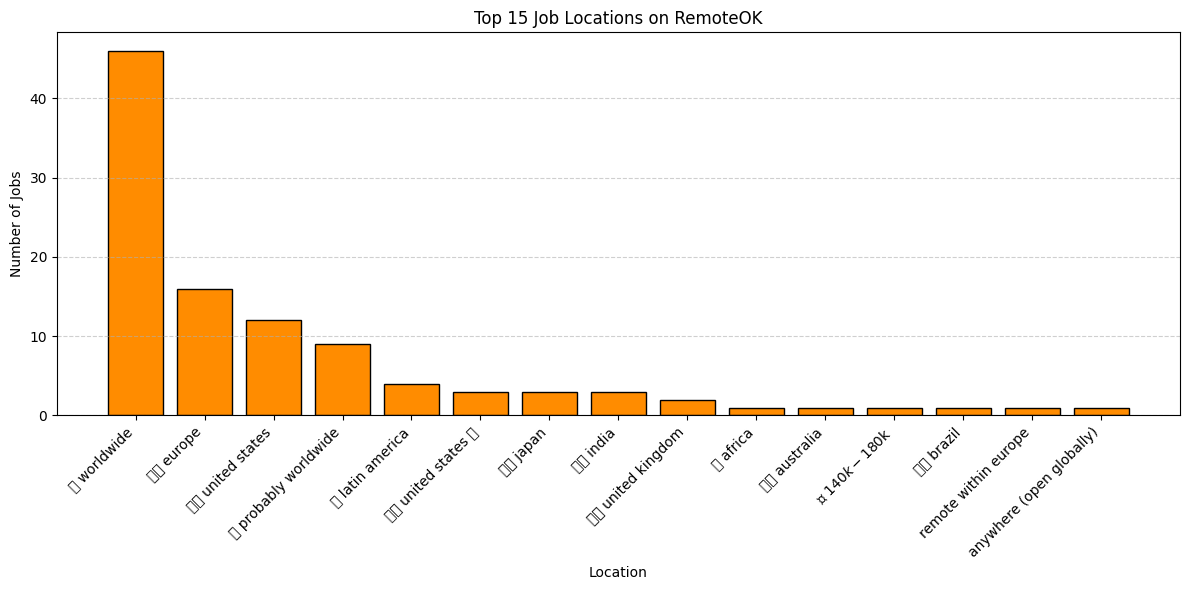

In [71]:
# Plot Top Locations
plt.figure(figsize=(12, 6))
plt.bar(location_counts.index, location_counts.values, color='darkorange', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Job Locations on RemoteOK')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipython-input-802503911.py:18: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-802503911.py:18: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-802503911.py:18: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-802503911.py:18: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-802503911.py:18: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-802503911.py:18: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-802503911.py:18: UserWarning: Gly

=== Most frequent skill per city ===
                     Location       Skill  Count
0                    1 remote         edu      1
7    anywhere (open globally)        lead      1
14                chicago, il         ceo      1
28            globally remote      crypto      1
48                    hamburg    branding      1
53                  hyderabad     content      1
60                  palo alto      docker      1
72       remote within europe     content      1
87             work from home  consultant      1
99               🇦🇺 australia      design      1
104                 🇧🇷 brazil     backend      1
106                 🇨🇦 canada     content      1
142                 🇪🇺 europe    engineer      7
195         🇬🇧 united kingdom      health      2
212              🇭🇰 hong kong    back-end      1
223                  🇮🇳 india    engineer      3
252                  🇯🇵 japan        data      3
267            🇵🇭 philippines  e-commerce      1
273                 🇵🇱 poland   

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) m

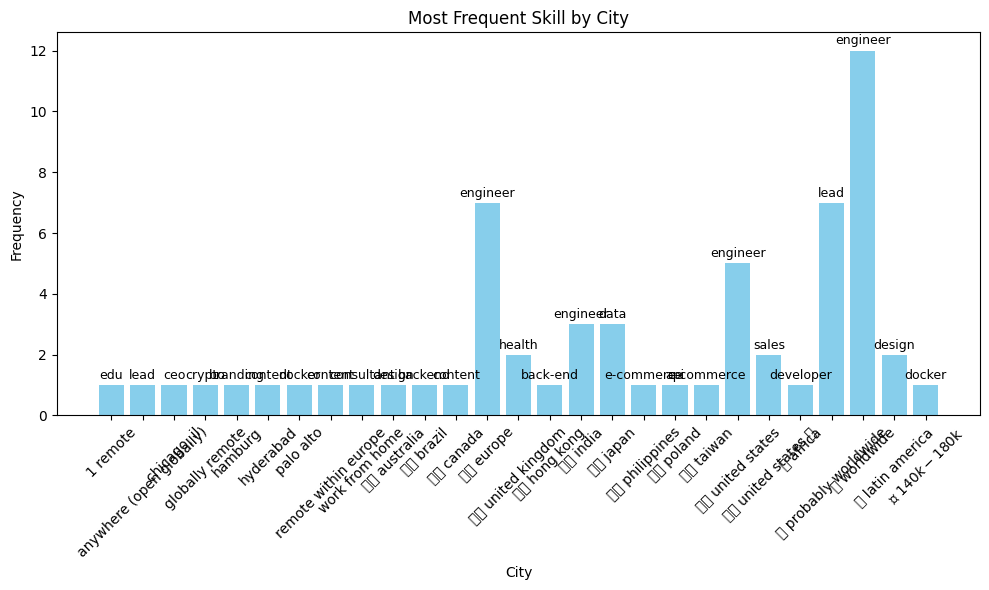

In [80]:
df_skills = df.assign(Skill=df['Skills'].str.split(", ")).explode('Skill')
skill_counts = df_skills.groupby(["Location", "Skill"]).size().reset_index(name="Count")

top_skill_by_city = skill_counts.loc[skill_counts.groupby("Location")["Count"].idxmax()]

print("=== Most frequent skill per city ===")
print(top_skill_by_city)
plt.figure(figsize=(10,6))
plt.bar(top_skill_by_city["Location"], top_skill_by_city["Count"], color="skyblue")

for i, row in top_skill_by_city.iterrows():
    plt.text(row["Location"], row["Count"]+0.2, row["Skill"], ha="center", fontsize=9)

plt.title("Most Frequent Skill by City")
plt.xlabel("City")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1773611946.py:22: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1773611946.py:22: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1773611946.py:22: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1773611946.py:22: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1773611946.py:22: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1773611946.py:22: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1773611946.py:22: UserWarni

=== Most frequent skill per Top 15 busiest cities ===
                     Location      Skill  Count
7    anywhere (open globally)       lead      1
72       remote within europe    content      1
99               🇦🇺 australia     design      1
104                 🇧🇷 brazil    backend      1
142                 🇪🇺 europe   engineer      7
195         🇬🇧 united kingdom     health      2
223                  🇮🇳 india   engineer      3
252                  🇯🇵 japan       data      3
325          🇺🇸 united states   engineer      5
377        🇺🇸 united states 🔒      sales      2
378                  🌍 africa  developer      1
413      🌏 probably worldwide       lead      7
475               🌏 worldwide   engineer     12
572           💃 latin america     design      2
593           💰 $140k - $180k     docker      1


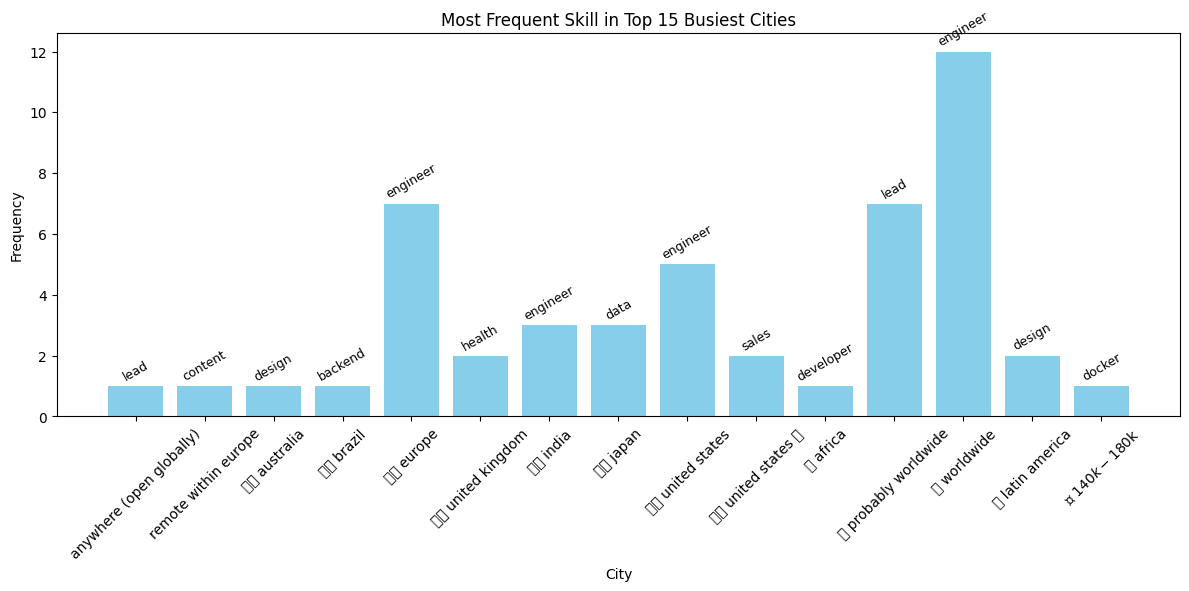

In [77]:
df_skills = df.assign(Skill=df['Skills'].str.split(", ")).explode('Skill')

skill_counts = df_skills.groupby(["Location", "Skill"]).size().reset_index(name="Count")
top_skill_by_city = skill_counts.loc[skill_counts.groupby("Location")["Count"].idxmax()]

busiest_cities = df["Location"].value_counts().nlargest(15).index
top_15_cities = top_skill_by_city[top_skill_by_city["Location"].isin(busiest_cities)]

print("=== Most frequent skill per Top 15 busiest cities ===")
print(top_15_cities)

plt.figure(figsize=(12,6))
plt.bar(top_15_cities["Location"], top_15_cities["Count"], color="skyblue")

for i, row in top_15_cities.iterrows():
    plt.text(row["Location"], row["Count"]+0.2, row["Skill"], ha="center", fontsize=9, rotation=30)

plt.title("Most Frequent Skill in Top 15 Busiest Cities")
plt.xlabel("City")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127466 (\N

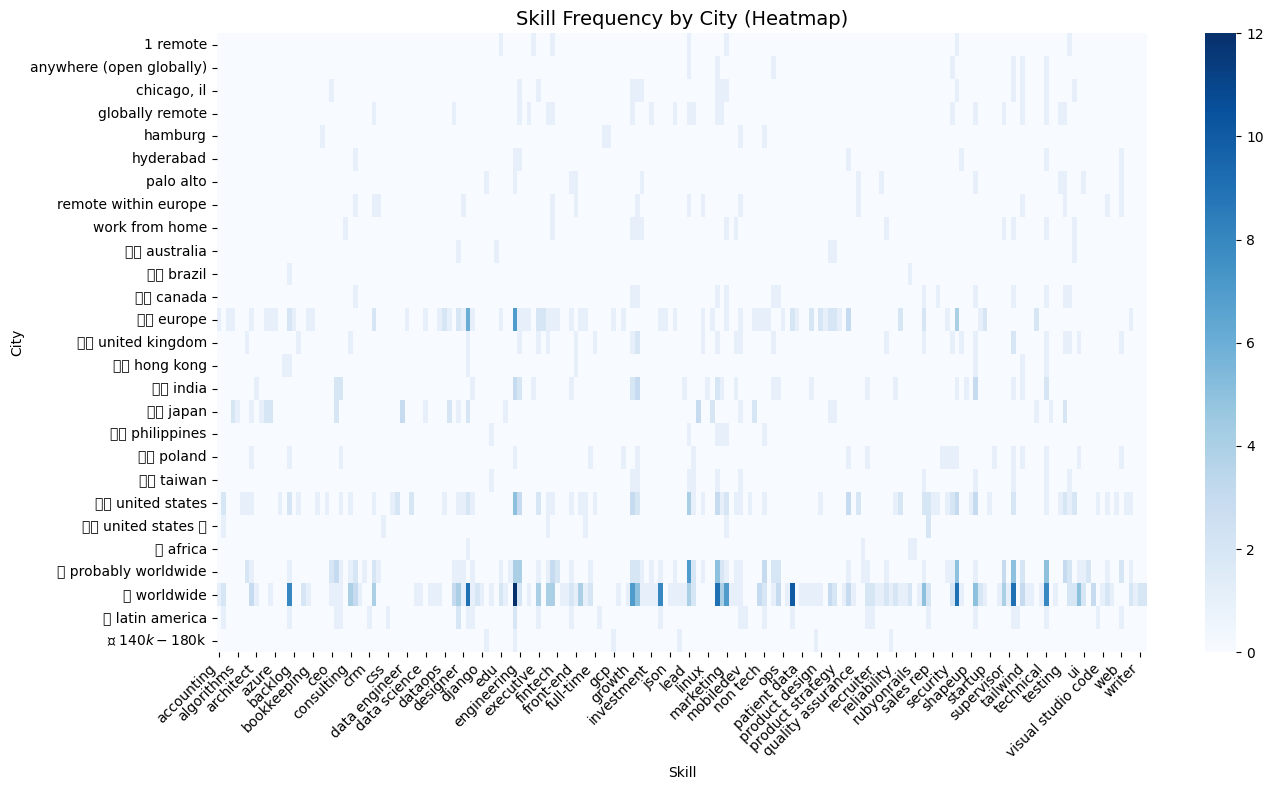

In [81]:
df_skills = df.assign(Skill=df['Skills'].str.split(", ")).explode('Skill')

pivot = df_skills.pivot_table(index="Location", columns="Skill", aggfunc="size", fill_value=0)

plt.figure(figsize=(14,8))
sns.heatmap(pivot, cmap="Blues", annot=False, cbar=True)

plt.title("Skill Frequency by City (Heatmap)", fontsize=14)
plt.xlabel("Skill")
plt.ylabel("City")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127482 (\N

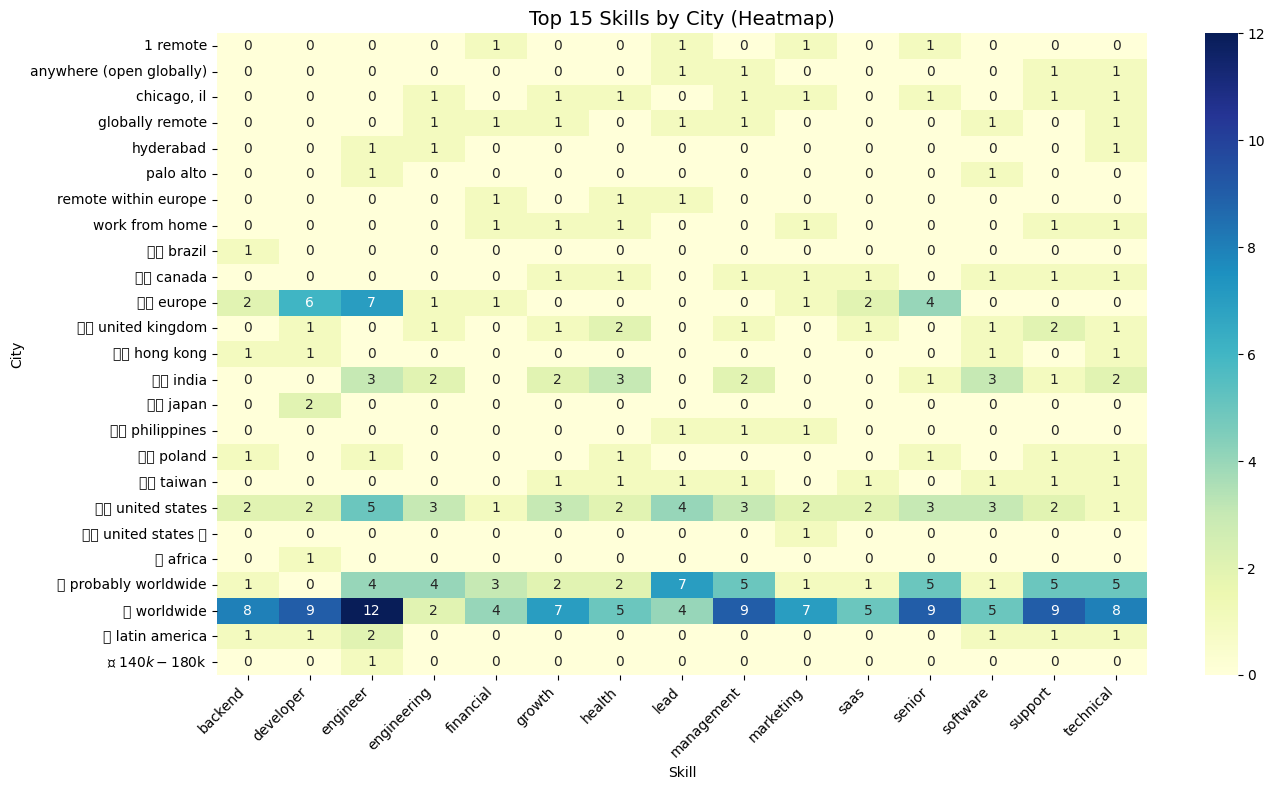

In [84]:
df_skills = df.assign(Skill=df['Skills'].str.split(", ")).explode('Skill')
top_skills = df_skills['Skill'].value_counts().nlargest(15).index

df_top = df_skills[df_skills['Skill'].isin(top_skills)]

pivot = df_top.pivot_table(index="Location", columns="Skill", aggfunc="size", fill_value=0)

plt.figure(figsize=(14,8))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt="d", cbar=True)

plt.title("Top 15 Skills by City (Heatmap)", fontsize=14)
plt.xlabel("Skill")
plt.ylabel("City")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127470 (\N

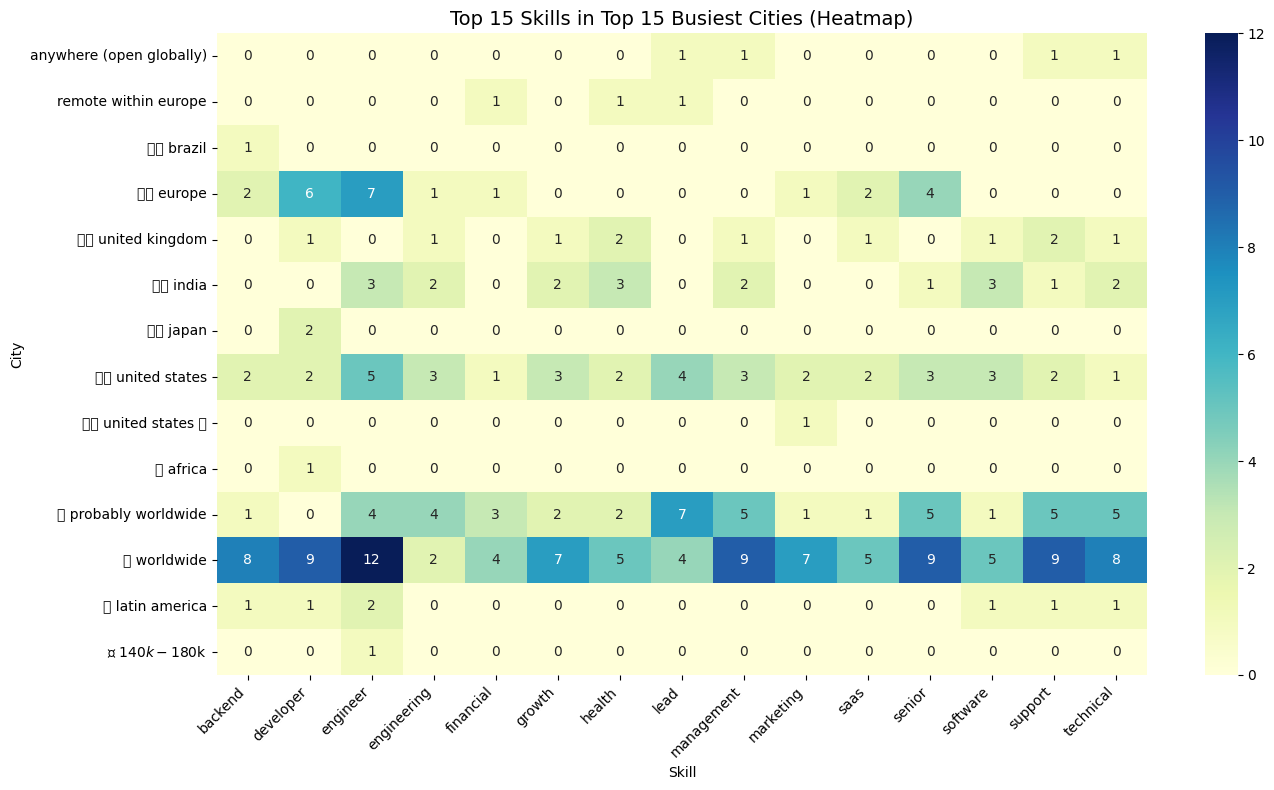

In [79]:
df_skills = df.assign(Skill=df['Skills'].str.split(", ")).explode('Skill')
top_skills = df_skills['Skill'].value_counts().nlargest(15).index
top_cities = df['Location'].value_counts().nlargest(15).index
df_top = df_skills[df_skills['Skill'].isin(top_skills) & df_skills['Location'].isin(top_cities)]

pivot = df_top.pivot_table(index="Location", columns="Skill", aggfunc="size", fill_value=0)

plt.figure(figsize=(14,8))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt="d", cbar=True)

plt.title("Top 15 Skills in Top 15 Busiest Cities (Heatmap)", fontsize=14)
plt.xlabel("Skill")
plt.ylabel("City")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


💻 Remote work insights
We'll see how many postings are remote vs on-site/other.

In [82]:
df['Remote_flag'] = df['Location'].str.contains("Remote", case=False, na=False)
remote_counts = df['Remote_flag'].value_counts()

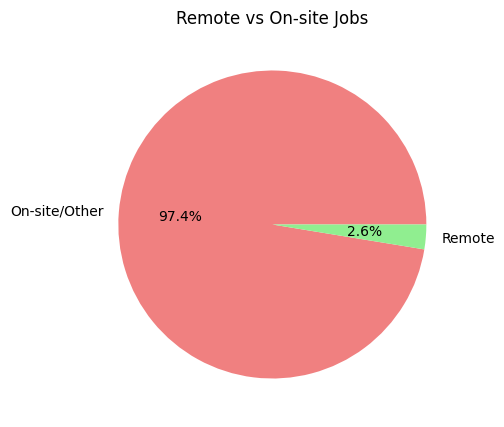

In [83]:
plt.figure(figsize=(5,5))
remote_counts.plot(kind='pie', labels=['On-site/Other', 'Remote'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title("Remote vs On-site Jobs")
plt.ylabel("")
plt.show()